In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

Dataset 1 can be separated by a linear decision boundry.

First, merge data from separate training examples into a single dataframe: 

In [4]:
mat = sio.loadmat('ex6data1.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data.head(5)
#data.tail(5)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


# Visualize Dataset 1

Text(0, 0.5, 'X2')

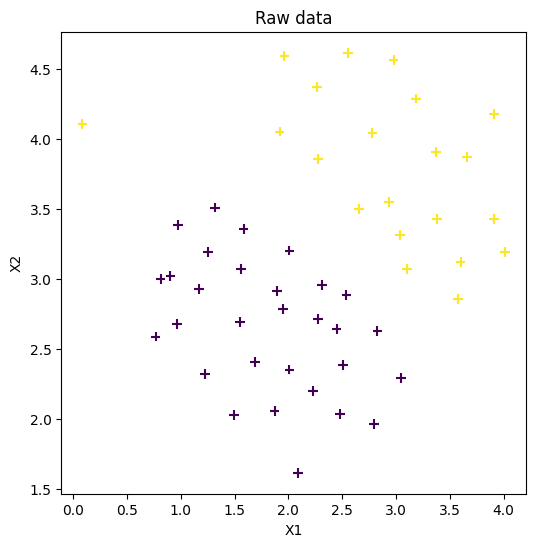

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['y'], marker = '+')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# Explore C, an SVM parameter for misclassification penalty
## $C=1$
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [6]:
svc100 = sklearn.svm.LinearSVC(C=1, loss='hinge')
svc100.fit(data[['X1', 'X2']], data['y'])
svc100.score(data[['X1', 'X2']], data['y'])

/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9803921568627451

In [7]:
data['SVM C=100 Confidence'] = svc100.decision_function(data[['X1', 'X2']])

Text(0.5, 1.0, 'SVM (C=100) Decision Confidence')

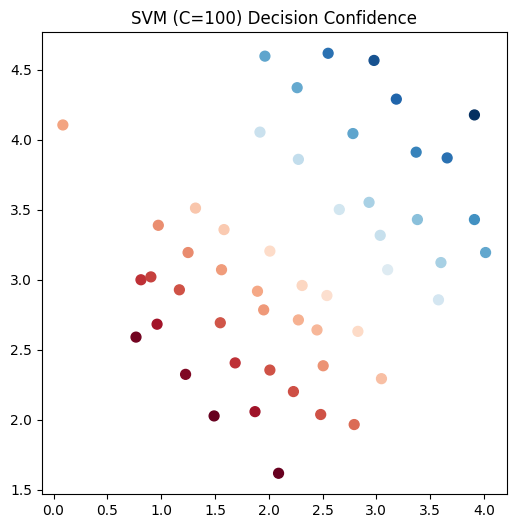

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM C=100 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')

In [9]:
data.head()

,X1,X2,y,SVM C=100 Confidence
0,1.9643,4.5957,1,0.869965
1,2.2753,3.8589,1,0.424583
2,2.9781,4.5651,1,1.426176
3,2.9320,3.5519,1,0.541678
4,3.5772,2.8560,1,0.322831


### Consclusion

Initially the C value is small, therefore the model is more willing to accept wrong classifications. As we increase the C value we see that the model tries to fit the data closer to the actual values, this can be seen by the increased confidence. This means that as we penalize the model more with higher values of C, we will see overfitting by the SVM classifier.